# all data models

In [ ]:
mypath = "./Data/DataModel/"
from os import listdir
from os.path import isfile, join, basename
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)
import data_model as dm
print(basename(mypath + onlyfiles[0]))
#dm = dm.DataModel(dm.json_file_to_data_model(mypath + onlyfiles[0]))


# generate form

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(columns=['a','b','c'])
data = 4*[pd.Series(3*[np.nan], index=df.columns )]
mod_df  = df.append(data, ignore_index=True)
mod_df.to_csv('./test.csv')

In [ ]:
from data_model import DataModel
from param import parms

parms = list(parms.values())
dm = DataModel('Test', parms[0], [parms[1], parms[2]],14)
print(dm.basic_parameeters())

 

# pandas add series

In [ ]:
import pandas as pd
import numpy as np
df =  pd.DataFrame(columns=['a', 'b', 'c'])
luints = ['a', 'b', 'c']
data = [pd.Series(luints, index=df.columns )]
data_diam = pd.read_csv('./filled_form.csv')
#data_diam = data_diam.drop([0])
#data_diam = data_diam.drop(data_diam.columns[[0]], axis=1)


values = data_diam.values
# print(values[:4,:4])
values = values[1:,1:]
# print(values[:4,:4])
values = np.array(values, dtype=np.double)
# print(values[:4,:4])

data_diam = pd.DataFrame(values, columns=data_diam.columns[1:], )
print(data_diam)
# print(data_diam.iloc[:,0])
import sys
sys.path.insert(0, "./labs")
from labs.algorithms import categories_derived, stepwise_regression

sderived = str(data_diam.columns[0])
lbasics = list(data_diam.columns)

cat_derivied = categories_derived(data_diam.iloc[:,0])
data_diam.iloc[:,0] = cat_derivied


lbasics.remove(sderived)

(fit_model, param_in_model, cur_pvalue) = stepwise_regression(data_diam, sderived, lbasics)
print(param_in_model)

print(list(fit_model.params.index))
print(fit_model.params.values)

# Pickle

In [ ]:
import pandas as pd
import numpy as np
import pickle
from report import Report

report = Report('./filled_form.csv')
with open('./picklTest', 'wb') as file:
    pickle.dump(report, file)

# reduce 

In [ ]:
from functools import reduce

a = [1,2,3,4]
b = [None, None]
c = [1, None]
print(reduce(lambda a,b: a & (b is None), b, True ))

# report


In [1]:
from report import Report
import pandas as pd
data_diam = pd.DataFrame(6*[[1,2,3]])
print(data_diam.iloc[1:,1])
Report('./filled_form.csv')

1    2
2    2
3    2
4    2
5    2
Name: 1, dtype: int64


In [7]:
from report import Report
import pandas as pd

report = Report.load('a')
report2 = Report.load('b')
frames = [report.data_categroies, report2.data_categroies]
result = pd.concat(frames)


print('a')

a


# Evaluation graph

['a', 'b']


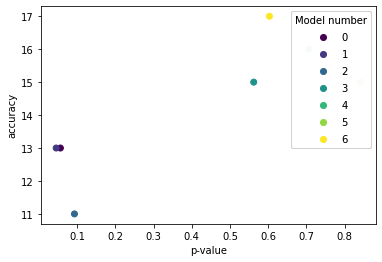

: 

In [1]:
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QMainWindow,QInputDialog, QLineEdit, QDialog, QLabel, QComboBox, QPushButton

import sys
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

from ReportsScreenResearcher import Ui_FullReportWindow
from config import Configuration, lalg_name, lfilter_name, regression_alg

from report import Report,FullReport
from data_model import DataModel

import sys
sys.path.insert(0, "./labs")
from labs.evaluation import evaluation_graph

config = Configuration.load()
data_model_name = 'sleep analysis 3'
data_model = DataModel.load("./Data/DataModel/" + data_model_name)
print(data_model._lforms_names)

ldata_categories = []
for report_name in data_model.lforms_names():
    report = Report.load(report_name)
    ldata_categories.append(report.data_categroies)
data = pd.concat(ldata_categories)

sderived = data.columns[0]
lbasics = list(data.columns.values)
lbasics.remove(sderived)

amount_of_days = data_model.num_days()

(x, y) = evaluation_graph(data, sderived, lbasics, amount_of_days, regression_alg[config.index_alg] )
import numpy as np
import matplotlib.pyplot as plt


N = len(x)
c = range(N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c)
plt.xlabel("p-value")
plt.ylabel("accuracy")

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                loc="upper right", title="Model number")
ax.add_artist(legend1)
plt.show()